# Import Required Libraries

In [215]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load and Explore Data

In [216]:
df=pd.read_csv("Housing.csv")

# Display Rows of Dataset

In [217]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [218]:
df.shape

(545, 13)

# The describe() function
The describe() function in a pandas DataFrame provides a statistical summary of the numerical columns. This summary includes measures such as count, mean, standard deviation, minimum, and maximum values, as well as the 25th, 50th (median), and 75th percentiles.

In [219]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [220]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [222]:
df["price"].unique()

array([13300000, 12250000, 12215000, 11410000, 10850000, 10150000,
        9870000,  9800000,  9681000,  9310000,  9240000,  9100000,
        8960000,  8890000,  8855000,  8750000,  8680000,  8645000,
        8575000,  8540000,  8463000,  8400000,  8295000,  8190000,
        8120000,  8080940,  8043000,  7980000,  7962500,  7910000,
        7875000,  7840000,  7700000,  7560000,  7525000,  7490000,
        7455000,  7420000,  7350000,  7343000,  7245000,  7210000,
        7140000,  7070000,  7035000,  7000000,  6930000,  6895000,
        6860000,  6790000,  6755000,  6720000,  6685000,  6650000,
        6629000,  6615000,  6580000,  6510000,  6475000,  6440000,
        6419000,  6405000,  6300000,  6293000,  6265000,  6230000,
        6195000,  6160000,  6125000,  6107500,  6090000,  6083000,
        6020000,  5950000,  5943000,  5880000,  5873000,  5866000,
        5810000,  5803000,  5775000,  5740000,  5652500,  5600000,
        5565000,  5530000,  5523000,  5495000,  5460000,  5425

In [223]:
df["price"].unique().sum()

1150235940

# Check for infinite values and replace them with NaN

In [224]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Replace missing values with the mean value of the column

In [225]:
df.fillna(df.mean(), inplace=True)

C:\Users\Noor\AppData\Local\Temp\ipykernel_956\820435583.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


# Set the aesthetic style of the plots

In [226]:
sns.set_style("whitegrid")

# Price vs Area, by Number of Bedrooms

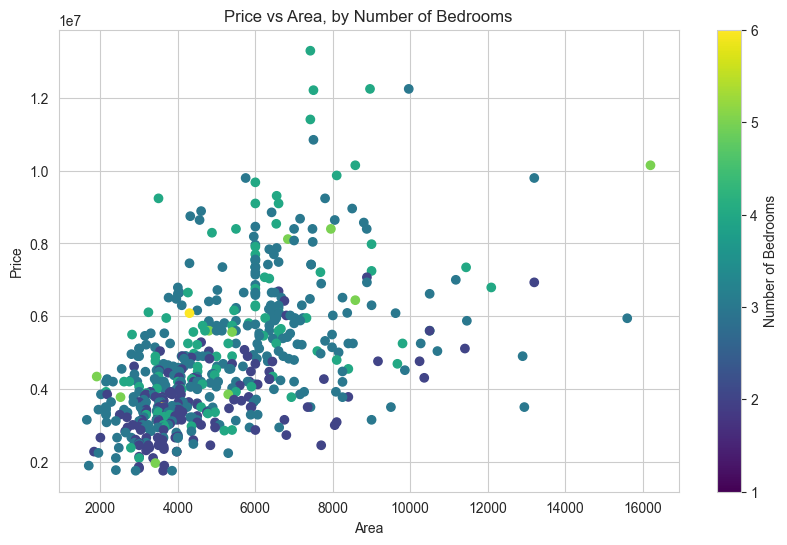

In [227]:
plt.figure(figsize=(10, 6))
plt.scatter(df['area'], df['price'], c=df['bedrooms'], cmap='viridis')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Price vs Area, by Number of Bedrooms')
_ = plt.colorbar(label='Number of Bedrooms')

# Scatter Plot of Price vs Area

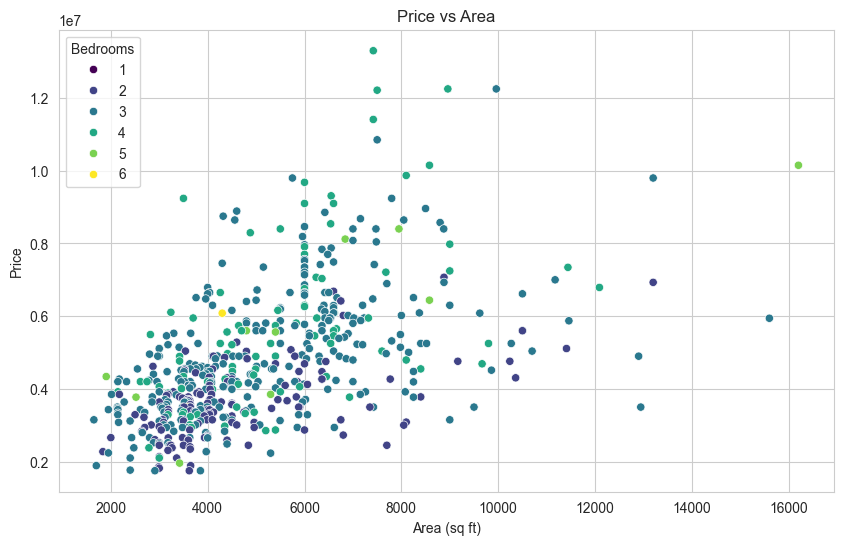

In [228]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='area', y='price', data=df, hue='bedrooms', palette='viridis')
plt.title('Price vs Area')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price')
plt.legend(title='Bedrooms')
plt.show()

# Distribution Plot of Price

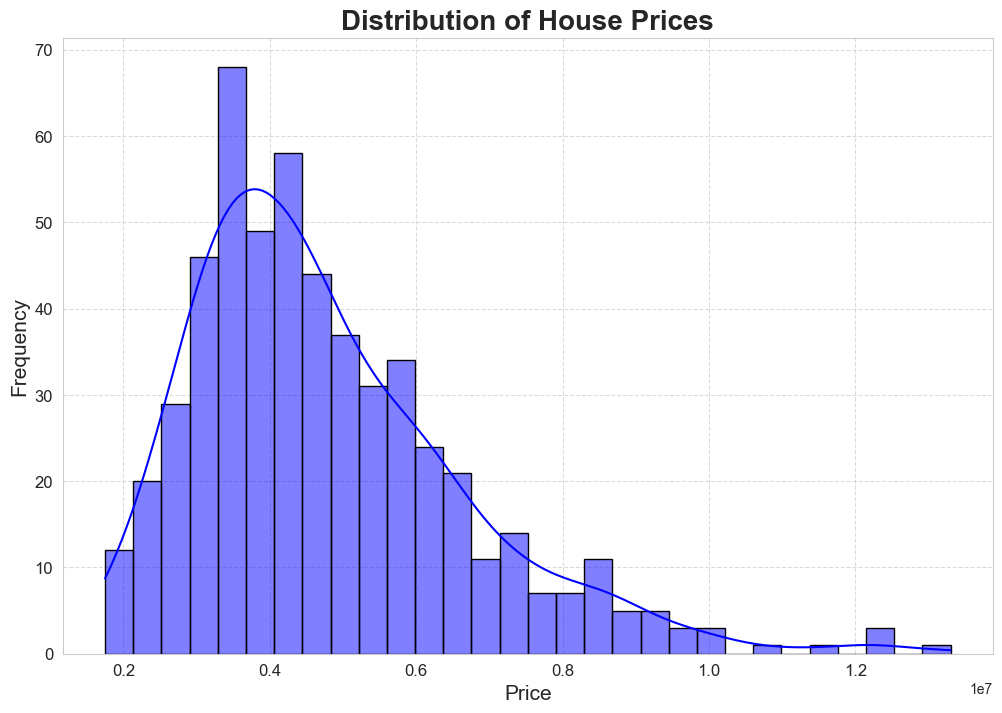

In [229]:
plt.figure(figsize=(12, 8))
sns.histplot(df['price'], bins=30, kde=True, color='blue', edgecolor='black')
plt.title('Distribution of House Prices', fontsize=20, weight='bold')
plt.xlabel('Price', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adding a grid
plt.grid(True, linestyle='--', alpha=0.7)

# Display the plot
plt.show()

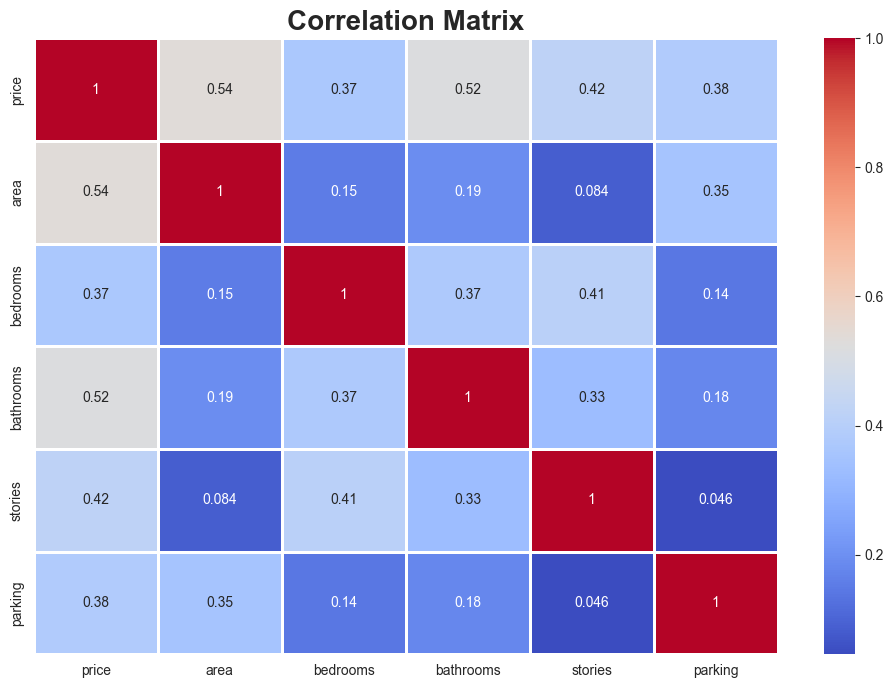

In [230]:
# Find the correlation between the variables
correlation = df.corr()

# Display the correlation
correlation

plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linecolor='white', linewidths=1)
plt.title('Correlation Matrix', fontsize=20, weight='bold')
plt.show()

# Count Plot of Bedrooms

C:\Users\Noor\AppData\Local\Temp\ipykernel_956\1276849908.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='bedrooms', data=df, palette='viridis')


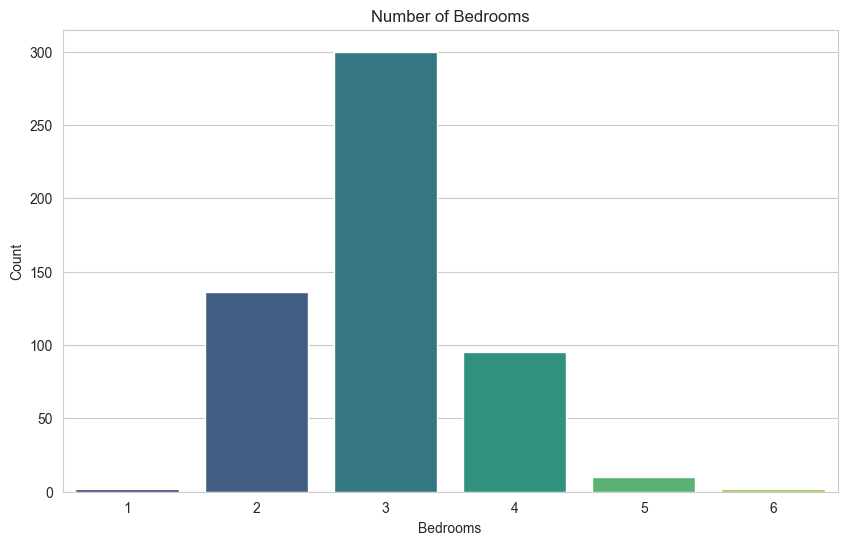

In [231]:
plt.figure(figsize=(10, 6))
sns.countplot(x='bedrooms', data=df, palette='viridis')
plt.title('Number of Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
plt.show()

# Count Plot of Bathrooms

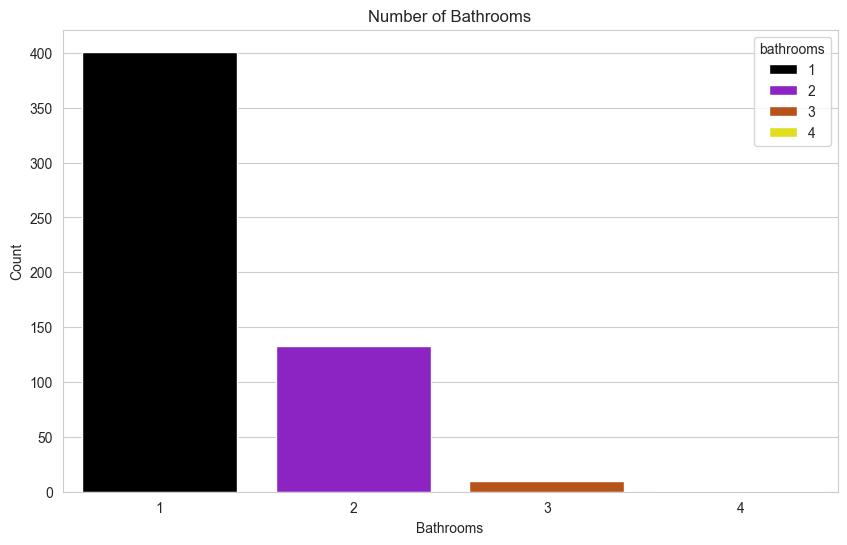

In [232]:
plt.figure(figsize=(10, 6))
sns.countplot(x='bathrooms', data=df, hue='bathrooms' ,palette='gnuplot')
plt.title('Number of Bathrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Count')
plt.show()

# Selecting relevant columns

In [233]:
df = df[['price', 'area', 'bedrooms', 'bathrooms']]

# Creating Independent and Dependent Variables

In [234]:
X = df[['area', 'bedrooms', 'bathrooms']]
y = df['price']

In [235]:
X.shape

(545, 3)

# Splitting the dataset into training and testing sets

In [236]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initializing the linear regression model

In [237]:
model = LinearRegression()

# Training the model

In [238]:
model.fit(X_train, y_train)

LinearRegression()

# Making predictions

In [239]:
y_pred = model.predict(X_test)
y_pred

array([6383168.05981192, 6230250.35140428, 3597885.28090091,
       4289730.8386382 , 3930445.60575177, 4883933.33918115,
       5505773.16533075, 6068793.48103629, 3321512.02483442,
       3495157.72744705, 8731338.12527607, 3561265.8244721 ,
       3487335.97847431, 3633344.35548029, 3933900.2714526 ,
       6661080.95290716, 2893133.47793136, 4635197.40872131,
       4583377.42320885, 4274999.75826381, 4296640.17003986,
       4920207.32903988, 3462807.85199841, 3875170.95453847,
       5412497.19140831, 7425564.68389184, 3269692.03932195,
       5021117.35611339, 7122556.71331971, 3238600.04801447,
       5366583.9261965 , 3640253.68688195, 6057517.06636272,
       4847659.34932243, 4572198.51082701, 5573863.86824637,
       4167435.67282878, 4021179.33154444, 3764621.65211187,
       5307730.62714319, 5319221.21748587, 3456243.98716683,
       6202613.02579763, 4013357.58257171, 4534099.68582614,
       4235271.10270425, 6057517.06636272, 4525560.52386579,
       4983206.22693419,

# Evaluating the model

In [240]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [241]:
print(f"Mean Squared Error: {mse}")
print(f"R-Squared: {r2}")

Mean Squared Error: 2750040479309.0513
R-Squared: 0.45592991188724474


In [242]:
X.columns

Index(['area', 'bedrooms', 'bathrooms'], dtype='object')

In [243]:
y.shape

(545,)

In [244]:
X_train.head()

,area,bedrooms,bathrooms
46,6000,3,2
93,7200,3,2
335,3816,2,1
412,2610,3,1
471,3750,3,1


In [245]:
y_train.head()

46     7525000
93     6300000
335    3920000
412    3430000
471    3010000
Name: price, dtype: int64

In [246]:
X.columns

Index(['area', 'bedrooms', 'bathrooms'], dtype='object')

In [247]:
# Predict the price of a sample house
sample_house = [[6000, 3, 2]]
sample_house_pred = model.predict(sample_house)
sample_house_pred

c:\Users\Noor\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([6057517.06636272])

In [248]:
# Actual price of the sample house
sample_house_actual = 7525000

# Calculate the percentage error
percentage_error = ((sample_house_actual - sample_house_pred) / sample_house_actual) * 100
percentage_error

array([19.50143433])

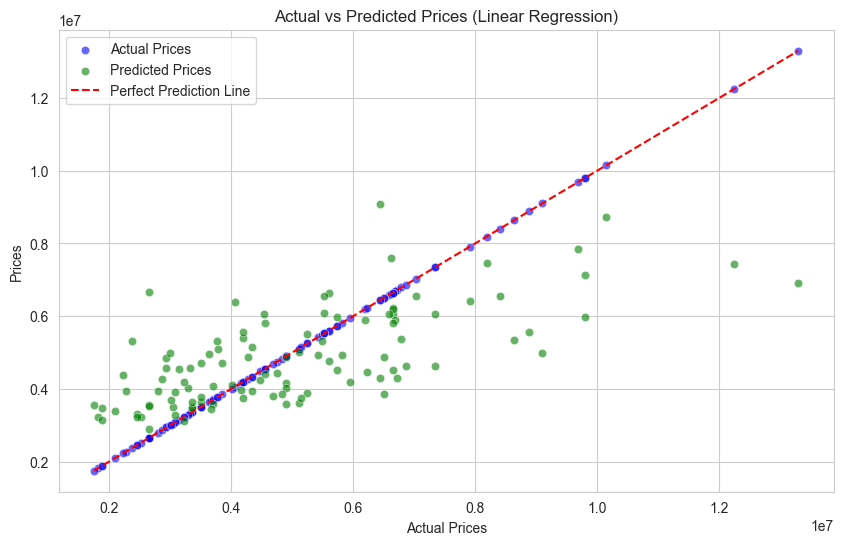

In [249]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming y_test and y_pred are already defined
plt.figure(figsize=(10, 6))

# Scatter plot of Actual prices
sns.scatterplot(x=y_test, y=y_test, color='blue', alpha=0.6, label='Actual Prices')

# Scatter plot of Predicted prices
sns.scatterplot(x=y_test, y=y_pred, color='green', alpha=0.6, label='Predicted Prices')

# Plot the identity line (Perfect Prediction Line)
x_values = np.linspace(min(y_test), max(y_test), 100)
plt.plot(x_values, x_values, color='red', linestyle='--', label='Perfect Prediction Line')

plt.xlabel('Actual Prices')
plt.ylabel('Prices')
plt.title('Actual vs Predicted Prices (Linear Regression)')
plt.legend()
plt.show()


# Optimize Model

## Polynomial Regression Model

In [250]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [251]:
# Initialize PolynomialFeatures with the desired degree
poly = PolynomialFeatures(degree=2)

# Transform the features
X_poly = poly.fit_transform(X)


In [252]:
# Initialize the Linear Regression model
poly_model = LinearRegression()
# Fit the model
poly_model.fit(X_poly, y)


LinearRegression()

In [253]:
# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
y_pred = poly_model.predict(X_poly)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
mean_absolute_error = np.mean(np.abs(y - y_pred))

print(f"Mean Squared Error: {mse}")
print(f"R-Squared: {r2}")
print(f"Mean Absolute Error: {mean_absolute_error}")


Mean Squared Error: 1619147364340.4814
R-Squared: 0.5363432407328946
Mean Absolute Error: 951693.1484789328


In [254]:
# new house
new_house = [[6000, 3, 2]]

In [255]:
# Transform new data (if available)
X_new_poly = poly.transform(new_house)

# Make predictions
y_pred = poly_model.predict(X_new_poly)


c:\Users\Noor\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [256]:
print(f"Predicted price for the new house: {y_pred}")

Predicted price for the new house: [6514043.02368897]


In [257]:
# Actual price of the new house
actual_price = 7525000

# Calculate the percentage error
percentage_error = ((actual_price - y_pred) / actual_price) * 100

print(f"Percentage error: {percentage_error}")

Percentage error: [13.4346442]


# Comparision
## Model 1 (Basic Linear Regression):

### Model: model = LinearRegression()
Characteristics: This model assumes a linear relationship between the features and the target variable. It might struggle with capturing non-linear relationships in the data.
### Model 2 (Polynomial Regression):

**Model: poly_model** = LinearRegression() with polynomial features added
Characteristics: This model extends linear regression by fitting a polynomial equation to the data, allowing it to capture non-linear relationships between the features and the target variable.

**Why Polynomial Regression (Model 2) May Perform Better**

Capturing Non-Linear Relationships:

Polynomial Features: By adding polynomial terms, Model 2 can capture more complex, non-linear relationships in the data. This often leads to better fit and improved model performance.

Better Fit:
MSE and R² Improvement: The lower MSE and higher R² in Model 2 indicate that polynomial regression provides a better fit to the data compared to basic linear regression. This suggests that the relationship between the features and target variable is more complex than a simple linear model can captur

# Day 01 Challenge Completed!